In [7]:
import multi_file_mod as ml
import pandas as pd
####################################################################################################################
#                       Trial 2  
# Folder: sdfat - 3_300(300 files), 60_15(15 files), 300_3(3 files)50
# 3_300
print('\nSdFat library---------------------')
relative_path = 'data/trial2/sdFat/3_300'
paths = ml.get_relative_paths(relative_path)
fsls = ml.inter_file_diff(relative_path)
df1 = ml.createDict(relative_path)
df1 = pd.DataFrame(df1).transpose()
# 60_15
relative_path = 'data/trial2/sdFat/60_15'
paths = ml.get_relative_paths(relative_path)
fsls = ml.inter_file_diff(relative_path)
df2 = ml.createDict(relative_path)
df2 = pd.DataFrame(df2).transpose()
# 300_3
relative_path = 'data/trial2/sdFat/300_3'
paths = ml.get_relative_paths(relative_path)
fsls = ml.inter_file_diff(relative_path)
df3 = ml.createDict(relative_path)
df3 = pd.DataFrame(df3).transpose()

df_sdfat = pd.concat([df1,df2,df3], axis=1, ignore_index=True)
df_sdfat = df_sdfat.iloc[:,300:]
df_sdfat.columns = range(len(df_sdfat.columns))


# Folder: exfat - 3_300(300 files), 60_15(15 files), 300_3(3 files)50
# 3_300
print('\nexFat library---------------------')
relative_path = 'data/trial2/exfat/3_300'
paths = ml.get_relative_paths(relative_path)
fsls = ml.inter_file_diff(relative_path)
df1 = ml.createDict(relative_path)
df1 = pd.DataFrame(df1).transpose()
# 60_15
relative_path = 'data/trial2/exfat/60_15'
paths = ml.get_relative_paths(relative_path)
fsls = ml.inter_file_diff(relative_path)
df2 = ml.createDict(relative_path)
df2 = pd.DataFrame(df2).transpose()
# 300_3
relative_path = 'data/trial2/exfat/300_3'
paths = ml.get_relative_paths(relative_path)
fsls = ml.inter_file_diff(relative_path)
df3 = ml.createDict(relative_path)
df3 = pd.DataFrame(df3).transpose()

df_exfat = pd.concat([df1,df2,df3], axis=1, ignore_index=True)
df_exfat = df_exfat.iloc[:,300:]
df_exfat.columns = range(len(df_exfat.columns))

# Folder: adafruit - 3_300(300 files), 60_15(15 files), 300_3(3 files) 
# 3_300
print('\nadafruit library---------------------')
relative_path = 'data/trial1/nostruct/15_20/3_300'
paths = ml.get_relative_paths(relative_path)
fsls = ml.inter_file_diff(relative_path)
df1 = ml.createDict(relative_path)
df1 = pd.DataFrame(df1).transpose()
# 60_15
relative_path = 'data/trial1/nostruct/15_20/60_15'
paths = ml.get_relative_paths(relative_path)
fsls = ml.inter_file_diff(relative_path)
df2 = ml.createDict(relative_path)
df2 = pd.DataFrame(df2).transpose()
# 300_3
relative_path = 'data/trial1/nostruct/15_20/300_3'
paths = ml.get_relative_paths(relative_path)
fsls = ml.inter_file_diff(relative_path)
df3 = ml.createDict(relative_path)
df3 = pd.DataFrame(df3).transpose()

df_adafruit = pd.concat([df1,df2,df3], axis=1, ignore_index=True)
df_adafruit = df_adafruit.iloc[:,300:]
df_adafruit.columns = range(len(df_adafruit.columns))


SdFat library---------------------
Differences between last of one file and first of the next:
Start File:  data/trial2/sdFat/3_300
min (ms):  702.1
max (ms):  732.5
median (ms):  706.7
Total differences calculated:  299
Differences between last of one file and first of the next:
Start File:  data/trial2/sdFat/60_15
min (ms):  706.9
max (ms):  738.5
median (ms):  707.6500000000001
Total differences calculated:  14
Differences between last of one file and first of the next:
Start File:  data/trial2/sdFat/300_3
min (ms):  708.6
max (ms):  711.1
median (ms):  709.85
Total differences calculated:  2

exFat library---------------------
Differences between last of one file and first of the next:
Start File:  data/trial2/exfat/3_300
min (ms):  699.7
max (ms):  749.9
median (ms):  700.5
Total differences calculated:  299
Differences between last of one file and first of the next:
Start File:  data/trial2/exfat/60_15
min (ms):  700.8
max (ms):  726.4
median (ms):  701.3
Total differences calcu

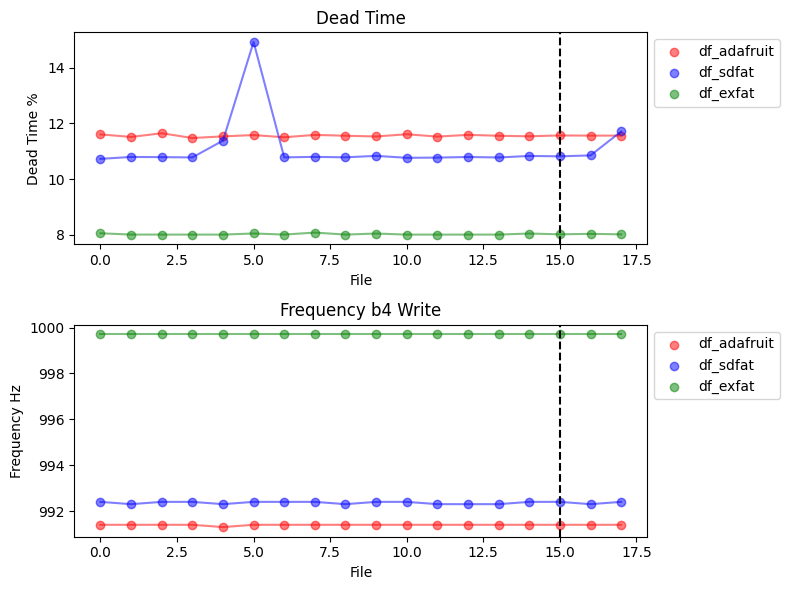

In [10]:
import matplotlib.pyplot as plt

# Create subplots for each metric
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,6))

# Define colors for each DataFrame
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow']

# Iterate over DataFrame names
for i, df_name in enumerate([
    'df_adafruit', 'df_sdfat', 'df_exfat'
]):
    # Get the DataFrame
    df = globals()[df_name]
    
    # Extract x and y data
    x = df.columns
    y1 = df.loc['dead_time_percent']
    y2 = df.loc['freq_b4_write']
    
    # Plot dead time as scatter plot
    # ax1.scatter(x, y1, color=colors[i % len(colors)], label=f'{df_name}')
    ax1.plot(x, y1, color=colors[i % len(colors)], alpha=0.5)
    ax1.scatter(x, y1, color=colors[i % len(colors)], alpha=0.5, label=f'{df_name}')
    
    # Plot frequency as scatter plot
    # ax2.scatter(x, y2, color=colors[i % len(colors)], label=f'{df_name}')
    ax2.plot(x, y2, color=colors[i % len(colors)], alpha=0.5)
    ax2.scatter(x, y2, color=colors[i % len(colors)], alpha=0.5, label=f'{df_name}')

# Set titles and labels
ax1.set_title('Dead Time')
ax1.set_xlabel('File')
ax1.set_ylabel('Dead Time %')
ax2.set_title('Frequency b4 Write')
ax2.set_xlabel('File')
ax2.set_ylabel('Frequency Hz')

# Add vertical lines
ax1.axvline(x=15, color='black', linestyle='--')
# ax1.axvline(x=315, color='gray', linestyle='--')
ax2.axvline(x=15, color='black', linestyle='--')
# ax2.axvline(x=315, color='gray', linestyle='--')

# Set y-axis to logarithmic scale
# ax1.set_yscale('log')
# ax2.set_yscale('log')

# Add legends
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [2]:
import multi_file_mod as ml
import pandas as pd
####################################################################################################################
#                       Trial 3  
# Folder: flag 02 - 3_300(300 files), 60_15(15 files), 300_3(3 files)50
# 3_300
print('\nOfast ---------------------')
relative_path = 'data/trial3/Ofast/3_300'
paths = ml.get_relative_paths(relative_path)
fsls = ml.inter_file_diff(relative_path)
df1 = ml.createDict(relative_path)
df1 = pd.DataFrame(df1).transpose()
# 60_15
relative_path = 'data/trial3/Ofast/60_15'
paths = ml.get_relative_paths(relative_path)
fsls = ml.inter_file_diff(relative_path)
df2 = ml.createDict(relative_path)
df2 = pd.DataFrame(df2).transpose()
# 300_3
relative_path = 'data/trial3/Ofast/300_3'
paths = ml.get_relative_paths(relative_path)
fsls = ml.inter_file_diff(relative_path)
df3 = ml.createDict(relative_path)
df3 = pd.DataFrame(df3).transpose()

df_ofast = pd.concat([df1,df2,df3], axis=1, ignore_index=True)


# Folder: exfat - 3_300(300 files), 60_15(15 files), 300_3(3 files)50
# 3_300
print('\nStandard ---------------------')
relative_path = 'data/trial2/exfat/3_300'
paths = ml.get_relative_paths(relative_path)
fsls = ml.inter_file_diff(relative_path)
df1 = ml.createDict(relative_path)
df1 = pd.DataFrame(df1).transpose()
# 60_15
relative_path = 'data/trial2/exfat/60_15'
paths = ml.get_relative_paths(relative_path)
fsls = ml.inter_file_diff(relative_path)
df2 = ml.createDict(relative_path)
df2 = pd.DataFrame(df2).transpose()
# 300_3
relative_path = 'data/trial2/exfat/300_3'
paths = ml.get_relative_paths(relative_path)
fsls = ml.inter_file_diff(relative_path)
df3 = ml.createDict(relative_path)
df3 = pd.DataFrame(df3).transpose()

df_standard = pd.concat([df1,df2,df3], axis=1, ignore_index=True)



Ofast ---------------------
Differences between last of one file and first of the next:
Start File:  data/trial3/Ofast/3_300
min (ms):  717.8
max (ms):  725.5
median (ms):  722.9
Total differences calculated:  299
Differences between last of one file and first of the next:
Start File:  data/trial3/Ofast/60_15
min (ms):  722.9
max (ms):  727.4
median (ms):  723.95
Total differences calculated:  14
Differences between last of one file and first of the next:
Start File:  data/trial3/Ofast/300_3
min (ms):  725.2
max (ms):  725.6
median (ms):  725.4000000000001
Total differences calculated:  2

Standard ---------------------
Differences between last of one file and first of the next:
Start File:  data/trial2/exfat/3_300
min (ms):  699.7
max (ms):  749.9
median (ms):  700.5
Total differences calculated:  299
Differences between last of one file and first of the next:
Start File:  data/trial2/exfat/60_15
min (ms):  700.8
max (ms):  726.4
median (ms):  701.3
Total differences calculated:  14


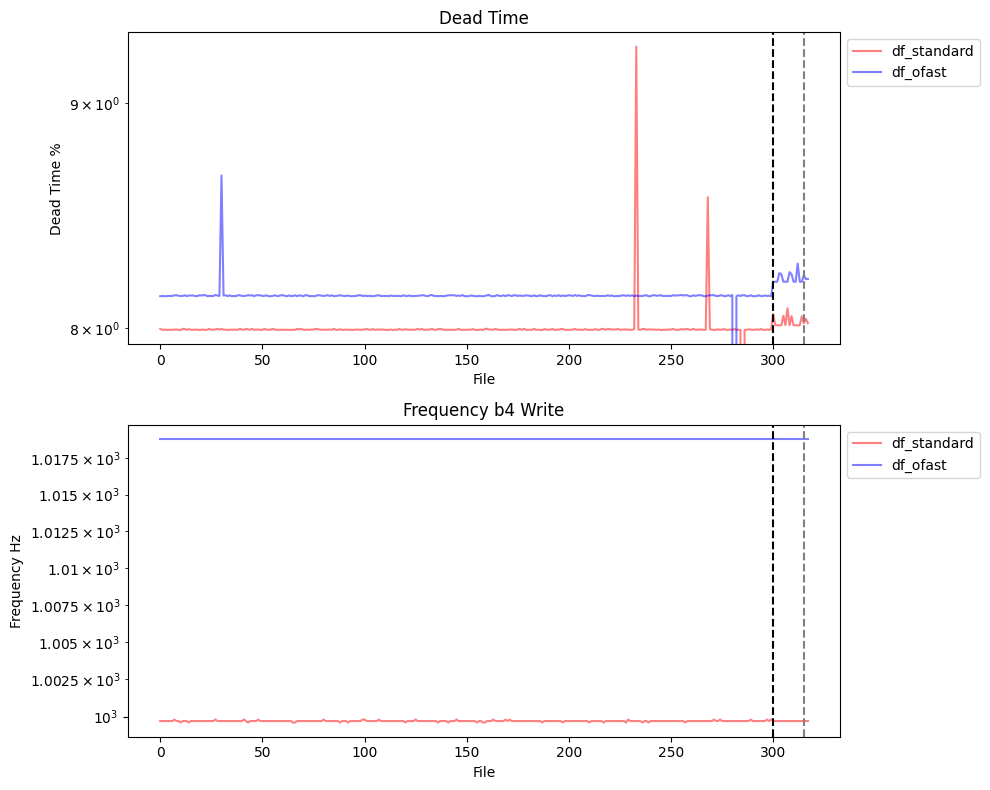

In [3]:
import matplotlib.pyplot as plt

# Create subplots for each metric
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,8))

# Define colors for each DataFrame
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow']

# Iterate over DataFrame names
for i, df_name in enumerate([
    'df_standard', 'df_ofast'
]):
    # Get the DataFrame
    df = globals()[df_name]
    
    # Extract x and y data
    x = df.columns
    y1 = df.loc['dead_time_percent']
    y2 = df.loc['freq_b4_write']
    
    # Plot dead time as scatter plot
    # ax1.scatter(x, y1, color=colors[i % len(colors)], label=f'{df_name}')
    ax1.plot(x, y1, color=colors[i % len(colors)], alpha=0.5, label=f'{df_name}')
    
    # Plot frequency as scatter plot
    # ax2.scatter(x, y2, color=colors[i % len(colors)], label=f'{df_name}')
    ax2.plot(x, y2, color=colors[i % len(colors)], alpha=0.5, label=f'{df_name}')

# Set titles and labels
ax1.set_title('Dead Time')
ax1.set_xlabel('File')
ax1.set_ylabel('Dead Time %')
ax2.set_title('Frequency b4 Write')
ax2.set_xlabel('File')
ax2.set_ylabel('Frequency Hz')

# Add vertical lines
ax1.axvline(x=300, color='black', linestyle='--')
ax1.axvline(x=315, color='gray', linestyle='--')
ax2.axvline(x=300, color='black', linestyle='--')
ax2.axvline(x=315, color='gray', linestyle='--')

# Set y-axis to logarithmic scale
ax1.set_yscale('log')
ax2.set_yscale('log')

# Add legends
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [38]:
import multi_file_mod as ml
import pandas as pd
####################################################################################################################
#                       Trial 4  


# Folder: exfat - 3_300(300 files), 60_15(15 files), 300_3(3 files)50
# 3_300
print('\nStandard ---------------------')
relative_path = 'data/trial2/exfat/3_300'
paths = ml.get_relative_paths(relative_path)
fsls = ml.inter_file_diff(relative_path)
df1 = ml.createDict(relative_path)
df1 = pd.DataFrame(df1).transpose()
# 60_15
relative_path = 'data/trial2/exfat/60_15'
paths = ml.get_relative_paths(relative_path)
fsls = ml.inter_file_diff(relative_path)
df2 = ml.createDict(relative_path)
df2 = pd.DataFrame(df2).transpose()
# 300_3
relative_path = 'data/trial2/exfat/300_3'
paths = ml.get_relative_paths(relative_path)
fsls = ml.inter_file_diff(relative_path)
df3 = ml.createDict(relative_path)
df3 = pd.DataFrame(df3).transpose()

df_standard = pd.concat([df1,df2,df3], axis=1, ignore_index=True)
df_standard = df_standard.iloc[:,300:]
df_standard.columns = range(len(df_standard.columns))



# Folder: DMA512  - 3_300(300 files), 60_15(15 files), 300_3(3 files)50
# 3_300
print('\nDMA512 Edit ---------------------')
relative_path = 'data/trial4/dma512/3_300'
paths = ml.get_relative_paths(relative_path)
fsls = ml.inter_file_diff(relative_path)
df1 = ml.createDict(relative_path)
df1 = pd.DataFrame(df1).transpose()
# 60_15
relative_path = 'data/trial4/dma512/60_15'
paths = ml.get_relative_paths(relative_path)
fsls = ml.inter_file_diff(relative_path)
df2 = ml.createDict(relative_path)
df2 = pd.DataFrame(df2).transpose()
# 300_3
relative_path = 'data/trial4/dma512/300_3'
paths = ml.get_relative_paths(relative_path)
fsls = ml.inter_file_diff(relative_path)
df3 = ml.createDict(relative_path)
df3 = pd.DataFrame(df3).transpose()

df_DMA512 = pd.concat([df1,df2,df3], axis=1, ignore_index=True)
df_DMA512 = df_DMA512.iloc[:,300:]
df_DMA512.columns = range(len(df_DMA512.columns))

# Folder: DMA128  - 3_300(300 files), 60_15(15 files), 300_3(3 files)50
# 3_300
print('\nDMA128 Edit ---------------------')
# relative_path = 'data/trial4/dma128/3_300'
# paths = ml.get_relative_paths(relative_path)
# fsls = ml.inter_file_diff(relative_path)
# df1 = ml.createDict(relative_path)
# df1 = pd.DataFrame(df1).transpose()
# 60_15
relative_path = 'data/trial4/dma128/60_15'
paths = ml.get_relative_paths(relative_path)
fsls = ml.inter_file_diff(relative_path)
df2 = ml.createDict(relative_path)
df2 = pd.DataFrame(df2).transpose()
# 300_3
relative_path = 'data/trial4/dma128/300_3'
paths = ml.get_relative_paths(relative_path)
fsls = ml.inter_file_diff(relative_path)
df3 = ml.createDict(relative_path)
df3 = pd.DataFrame(df3).transpose()

df_DMA128 = pd.concat([df1,df2,df3], axis=1, ignore_index=True)
df_DMA128 = df_DMA128.iloc[:,300:]
df_DMA128.columns = range(len(df_DMA128.columns))


# Folder: DMA64  - 3_300(300 files), 60_15(15 files), 300_3(3 files)50
# 3_300
print('\nDMA64 Edit ---------------------')
# relative_path = 'data/trial4/dma64/3_300'
# paths = ml.get_relative_paths(relative_path)
# fsls = ml.inter_file_diff(relative_path)
# df1 = ml.createDict(relative_path)
# df1 = pd.DataFrame(df1).transpose()
# 60_15
relative_path = 'data/trial4/dma64/60_15'
paths = ml.get_relative_paths(relative_path)
fsls = ml.inter_file_diff(relative_path)
df2 = ml.createDict(relative_path)
df2 = pd.DataFrame(df2).transpose()
# 300_3
relative_path = 'data/trial4/dma64/300_3'
paths = ml.get_relative_paths(relative_path)
fsls = ml.inter_file_diff(relative_path)
df3 = ml.createDict(relative_path)
df3 = pd.DataFrame(df3).transpose()

df_DMA64 = pd.concat([df1,df2,df3], axis=1, ignore_index=True)
df_DMA64 = df_DMA64.iloc[:,300:]
df_DMA64.columns = range(len(df_DMA64.columns))




Standard ---------------------
Differences between last of one file and first of the next:
Start File:  data/trial2/exfat/3_300
min (ms):  699.7
max (ms):  749.9
median (ms):  700.5
Total differences calculated:  299
Differences between last of one file and first of the next:
Start File:  data/trial2/exfat/60_15
min (ms):  700.8
max (ms):  726.4
median (ms):  701.3
Total differences calculated:  14
Differences between last of one file and first of the next:
Start File:  data/trial2/exfat/300_3
min (ms):  701.2
max (ms):  701.3
median (ms):  701.25
Total differences calculated:  2

DMA512 Edit ---------------------
Differences between last of one file and first of the next:
Start File:  data/trial4/dma512/3_300
min (ms):  696.9
max (ms):  702.6
median (ms):  699.8
Total differences calculated:  299
Differences between last of one file and first of the next:
Start File:  data/trial4/dma512/60_15
min (ms):  700.0
max (ms):  703.5
median (ms):  700.45
Total differences calculated:  14
Dif

In [35]:
len(df_DMA512.columns) ==len(df_DMA64.columns)


True

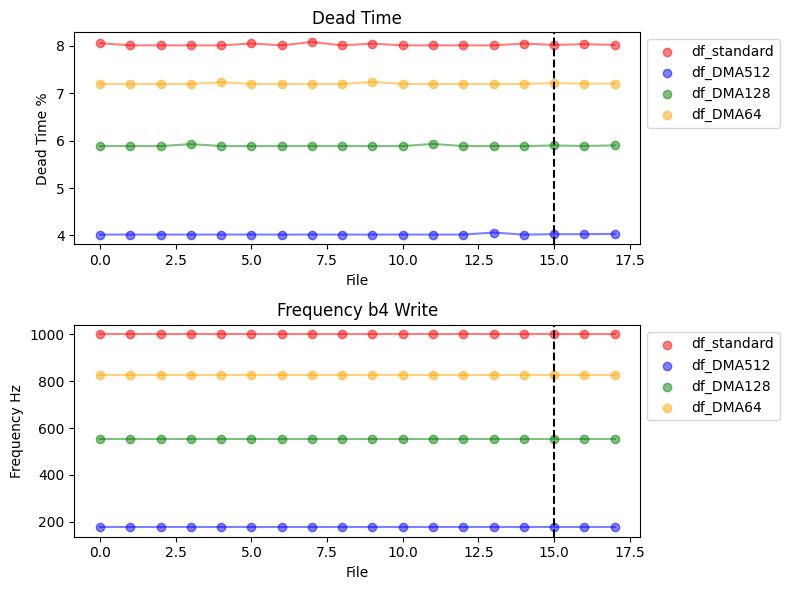

In [43]:
import matplotlib.pyplot as plt

# Create subplots for each metric
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,6))

# Define colors for each DataFrame
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow']

# Iterate over DataFrame names
for i, df_name in enumerate([
    'df_standard', 'df_DMA512',
    'df_DMA128','df_DMA64'
]):
    # Get the DataFrame
    df = globals()[df_name]
    
    # Extract x and y data
    x = df.columns
    y1 = df.loc['dead_time_percent']
    y2 = df.loc['freq_b4_write']
    
    # Plot dead time as scatter plot
    # ax1.scatter(x, y1, color=colors[i % len(colors)], label=f'{df_name}')
    ax1.plot(x[:], y1[:], color=colors[i % len(colors)], alpha=0.5)
    ax1.scatter(x[:], y1[:], color=colors[i % len(colors)], alpha=0.5, label=f'{df_name}')
    
    # Plot frequency as scatter plot
    # ax2.scatter(x, y2, color=colors[i % len(colors)], label=f'{df_name}')
    ax2.plot(x[:], y2[:], color=colors[i % len(colors)], alpha=0.5)
    ax2.scatter(x[:], y2[:], color=colors[i % len(colors)], alpha=0.5, label=f'{df_name}')

# Set titles and labels
ax1.set_title('Dead Time')
ax1.set_xlabel('File')
ax1.set_ylabel('Dead Time %')
ax2.set_title('Frequency b4 Write')
ax2.set_xlabel('File')
ax2.set_ylabel('Frequency Hz')

# Add vertical lines
ax1.axvline(x=15, color='black', linestyle='--')
# ax1.axvline(x=315, color='gray', linestyle='--')
ax2.axvline(x=15, color='black', linestyle='--')
# ax2.axvline(x=315, color='gray', linestyle='--')

# Set y-axis to logarithmic scale
# ax1.set_yscale('log')
# ax2.set_yscale('log')

# Add legends
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()